In [ ]:
import pandas as pd
import sqlalchemy as sa
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# PostgreSQL connection parameters
pg_params = {
    "user": "##",
    "password": "##",
    "host": "##",
    "port": "##",
    "database": "postgres"
}

conn_str = f'postgresql://{pg_params["user"]}:{pg_params["password"]}@{pg_params["host"]}:{pg_params["port"]}/{pg_params["database"]}'

# Create SQLAlchemy engine
engine = sa.create_engine(conn_str)

query = """
SELECT *
FROM drugoverdose
INNER JOIN causesofdeath ON causesofdeath.year = drugoverdose.year
"""

# Execute the query and read the results into a DataFrame
combined_data = pd.read_sql(query, engine)

# Dispose the engine
engine.dispose()

combined_data.head()

/Users/punyakn/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,indicator,panel,panel_num,unit,unit_num,stub_name,stub_name_num,stub_label,stub_label_num,year,year_num,age,age_num,estimate,year,_113_cause_name,cause_name,state,deaths,aadr
0,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: American Indian or Alaska Native,4.7,2017,19,All ages,1.1,7.5,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: Black or African American,4.6,2017,19,All ages,1.1,6.9,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
2,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Female: White,4.5,2017,19,All ages,1.1,10.7,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
3,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: Asian or Pacific Islander,4.4,2017,19,All ages,1.1,2.4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
4,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race,4,Male: American Indian or Alaska Native,4.3,2017,19,All ages,1.1,11.9,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4


This scatter plot will help us understand if there's any correlation between drug overdose death rates and the leading cause of death rates across different states and years.

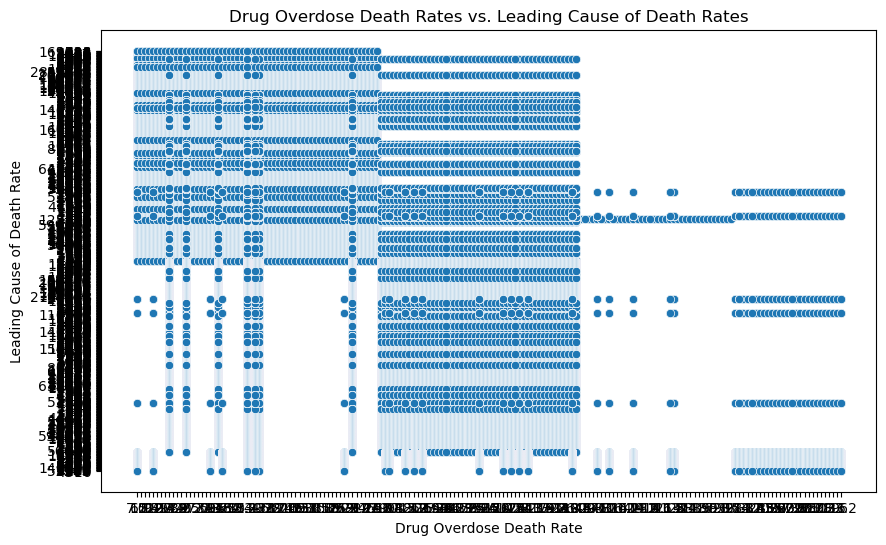

In [5]:
# Plotting drug overdose death rates vs. leading cause of death rates as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='estimate', y='deaths', data=combined_data)
plt.title('Drug Overdose Death Rates vs. Leading Cause of Death Rates')
plt.xlabel('Drug Overdose Death Rate')
plt.ylabel('Leading Cause of Death Rate')
plt.show()


This Pie chart provides a visualization of the distribution of average drug overdose death rates across different states, highlighting the most significant states individually and grouping the rest into a single category.

In [9]:
combined_data['estimate'] = pd.to_numeric(combined_data['estimate'], errors='coerce')

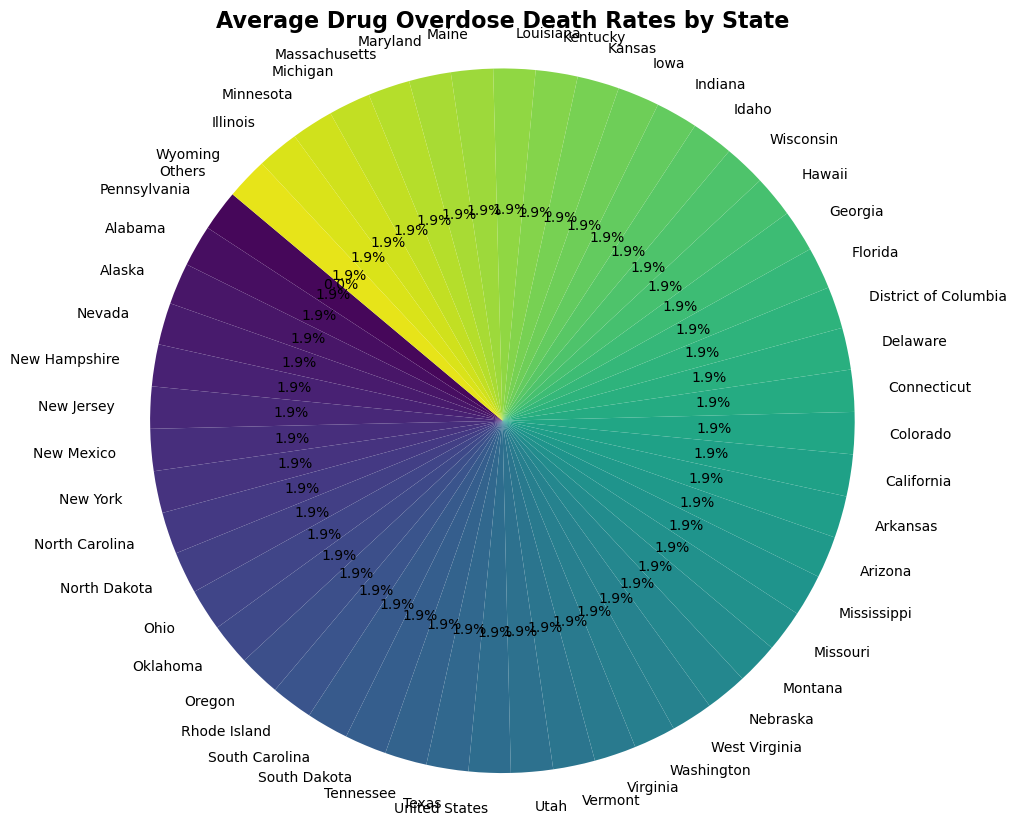

In [16]:
# Calculate mean overdose death rates by state
state_mean_rates = combined_data.groupby('state')['estimate'].mean().sort_values()

# Determine the threshold for including states in the pie chart
threshold = 5  

# Create a DataFrame with states above the threshold and combine others
significant_states = state_mean_rates[state_mean_rates >= threshold]
other_states = pd.Series(state_mean_rates[state_mean_rates < threshold].sum(), index=['Others'])
combined_states = pd.concat([significant_states, other_states])

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(combined_states, labels=combined_states.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(combined_states)))
plt.title('Average Drug Overdose Death Rates by State', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


this histogram helps us understand the overall pattern and variability in drug overdose death rates within the population, providing valuable insights for further analysis and decision-making in public health or related fields.

/Users/punyakn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


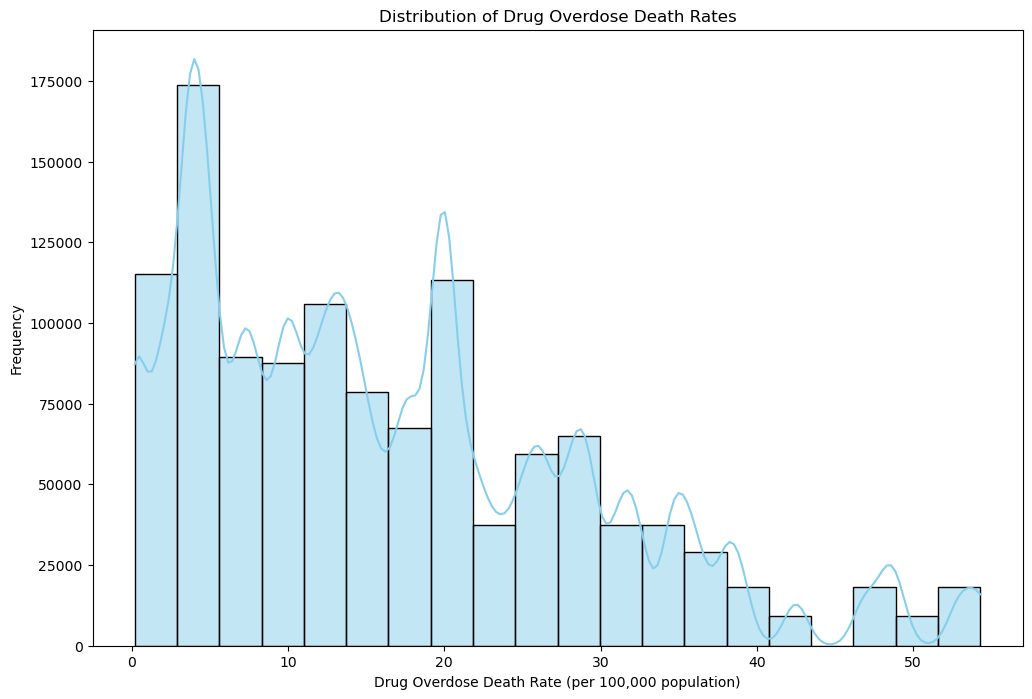

In [21]:
plt.figure(figsize=(12, 8))
sns.histplot(data=combined_data, x='estimate', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Drug Overdose Death Rates')
plt.xlabel('Drug Overdose Death Rate (per 100,000 population)')
plt.ylabel('Frequency')
plt.show()
